# **SmokeSignal - AI Training and Testing**

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np

ImportError: Traceback (most recent call last):
  File "c:\Users\dhyan\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

**Dataset Uploading via kaggle**

In [2]:
# Upload your kaggle.json key (download it from your Kaggle account)
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
# move and configure credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset
!kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset
!unzip wildfire-prediction-dataset.zip -d wildfire-prediction-dataset

Streaming output truncated to the last 5000 lines.
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.465183,45.443641.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: wildfire-prediction-dataset/valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: wil

In [5]:
# Set up directories
train_dir = "/content/wildfire-prediction-dataset/train"
valid_dir = "/content/wildfire-prediction-dataset/valid"
test_dir = "/content/wildfire-prediction-dataset/test"

In [6]:
# Set up ImageDataGenerators for loading images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load images from directories
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')

Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [8]:
# Building a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: wildfire or no wildfire
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# allow loading of images that are incomplete or corrupted -- TRUNCATED
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
# Train the model
history = model.fit(train_generator, validation_data=valid_generator, epochs=5, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 209s 219ms/step - accuracy: 0.8600 - loss: 0.3008 - val_accuracy: 0.9208 - val_loss: 0.1980
Epoch 2/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 205s 217ms/step - accuracy: 0.9294 - loss: 0.1916 - val_accuracy: 0.9460 - val_loss: 0.1537
Epoch 3/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 212s 224ms/step - accuracy: 0.9401 - loss: 0.1631 - val_accuracy: 0.9430 - val_loss: 0.1513
Epoch 4/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 255s 217ms/step - accuracy: 0.9451 - loss: 0.1496 - val_accuracy: 0.9535 - val_loss: 0.1298
Epoch 5/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 206s 218ms/step - accuracy: 0.9482 - loss: 0.1397 - val_accuracy: 0.9595 - val_loss: 0.1132


In [16]:
# Saving the model
model_save_path = '/content/wildfire_detector_model.keras'  #native keras (.keras)
model.save(model_save_path)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,875,845 (18.60 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,250,564 (12.40 MB)

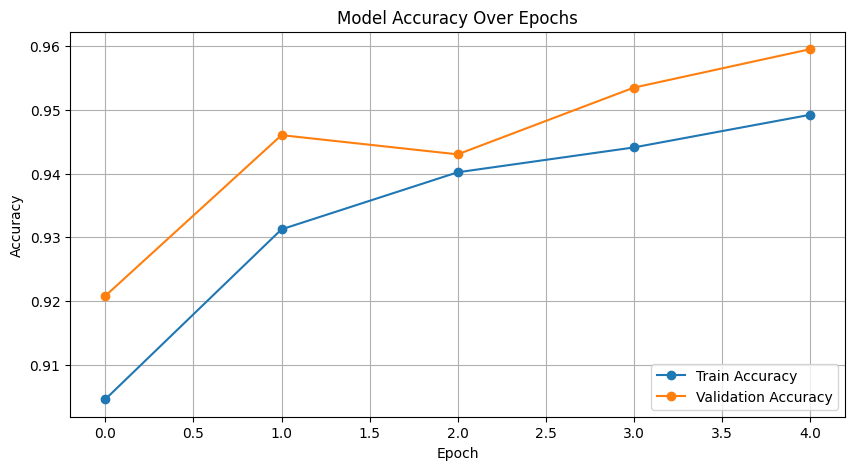

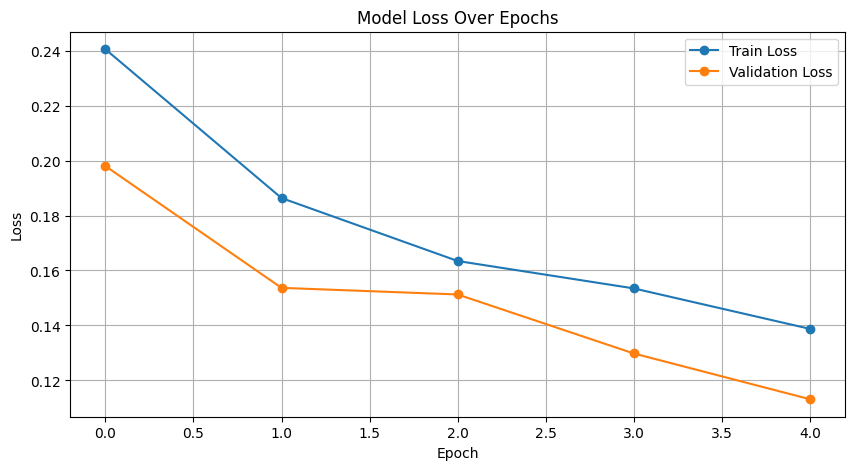

In [14]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()